In [6]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

data = pd.read_csv(r"C:\Users\P R O B O O K\Downloads\data_jobs.csv")
df = data.copy()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [9]:
#Only get data analyst job from united states
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop NAN vlaues from he column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US['salary_year_avg'].sample(10)

336428     95005.0
142969    125000.0
630715    127500.0
531169     90000.0
282843    135938.5
695753    125000.0
741353     97086.5
434613     74050.0
681720     93070.0
343989    107500.0
Name: salary_year_avg, dtype: float64

<Axes: >

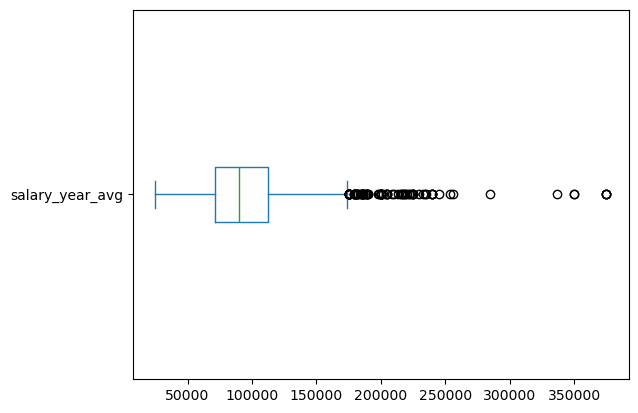

In [12]:
df_DA_US['salary_year_avg'].plot(kind='box', vert= False)

C:\Users\P R O B O O K\AppData\Local\Temp\ipykernel_10612\2214630734.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert= False)


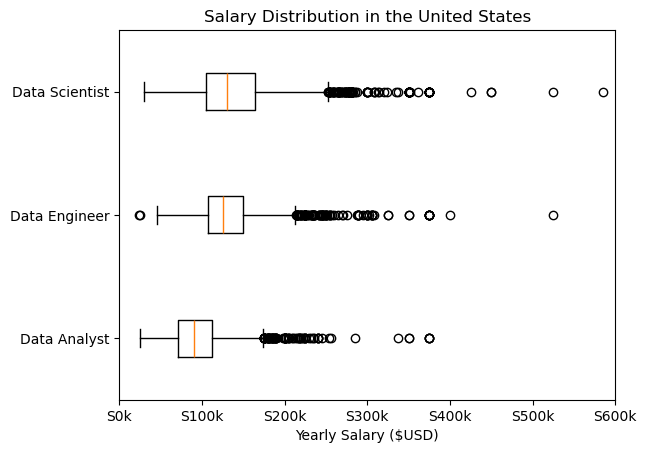

In [18]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#Filter f]the data to appropiate job_title
#only get data analyst jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert= False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0,600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'S{int(x/1000)}k'))
plt.show()